                                           Image Processing 5 Hewan Mamalia

                                                       Kelompok 1 
                                                      Kelas A1 2021
⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅⬅
##### Anggota Kelompok :

##### Bayu Abdurosyid - 2109106003
##### Alif Maulana Setyawan  - 2109106002
##### Ananta Yusra Putra.A - 2109106024



* silahkan install package di luar modul ini.

In [55]:
!pip install split_folders

# Import Library


In [12]:
from keras.models import load_model

import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns
import pandas as pd
import os

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membaca Direktori

In [3]:
dir = 'D:/UNMUL/vscode/PAKBBB/dataset'

# Membuat Class Name

In [4]:
class_names = ['elephant', 'horse', 'lion', 'cat', 'dog']

# Spliting Data 80% training 20% validasi

* hanya di gunakan sekali, jika sudah spliting data maka code ini tidak perlu di jalankan lagi.

In [59]:
#splitfolders.ratio(dir, output = 'D:/UNMUL/vscode/PAKBBB', ratio = (.8, .2))

# Sebelum Augmentasi

In [5]:
# Resolusi Width (w), high (h)
w = 100
h = 100

datagenbefore = ImageDataGenerator(
    rescale = 1./255
)

train_before = datagenbefore.flow_from_directory(
    'D:/UNMUL/vscode/PAKBBB/train',
    class_mode='categorical',
    subset = 'training',
    target_size = (w, h),
    batch_size = 256
)

Found 11995 images belonging to 5 classes.


# Diagram Bar Melihat Total Jumlah Gambar

In [6]:
elephant = 0
horse = 0
lion = 0
cat = 0
dog = 0

array =  [ 
          'D:/UNMUL/vscode/PAKBBB/dataset/ELEPHANT', 
          'D:/UNMUL/vscode/PAKBBB/dataset/HORSE', 
          'D:/UNMUL/vscode/PAKBBB/dataset/LION', 
          'D:/UNMUL/vscode/PAKBBB/dataset/cat', 
          'D:/UNMUL/vscode/PAKBBB/dataset/dog'
          ]

for path in os.scandir(array[0]):
  if path.is_file():
    elephant += 1
for path in os.scandir(array[1]):
  if path.is_file():
    horse += 1
for path in os.scandir(array[2]):
  if path.is_file():
    lion += 1
for path in os.scandir(array[3]):
  if path.is_file():
    cat += 1
for path in os.scandir(array[4]):
  if path.is_file():
    dog += 1

print('file count:', elephant)
print('file count:', horse)
print('file count:', lion)
print('file count:', cat)
print('file count:', dog)

animal = ['elephant', 'horse', 'lion', 'cat', 'dog']
count = [elephant, horse, lion, cat, dog]

file count: 3039
file count: 3009
file count: 2984
file count: 3037
file count: 2927


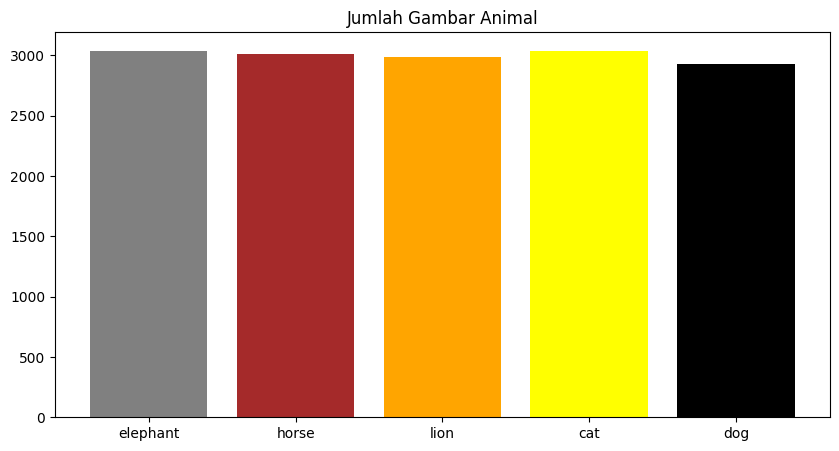

In [7]:
x = animal
y = count

plt.figure(figsize = (10,5))
plt.bar(x, y, color=['gray', 'brown', 'orange', 'yellow', 'black'])
plt.title("Jumlah Gambar Animal")
# plt.legend
plt.show()

# Visualisasi Sebelum Augmentasi

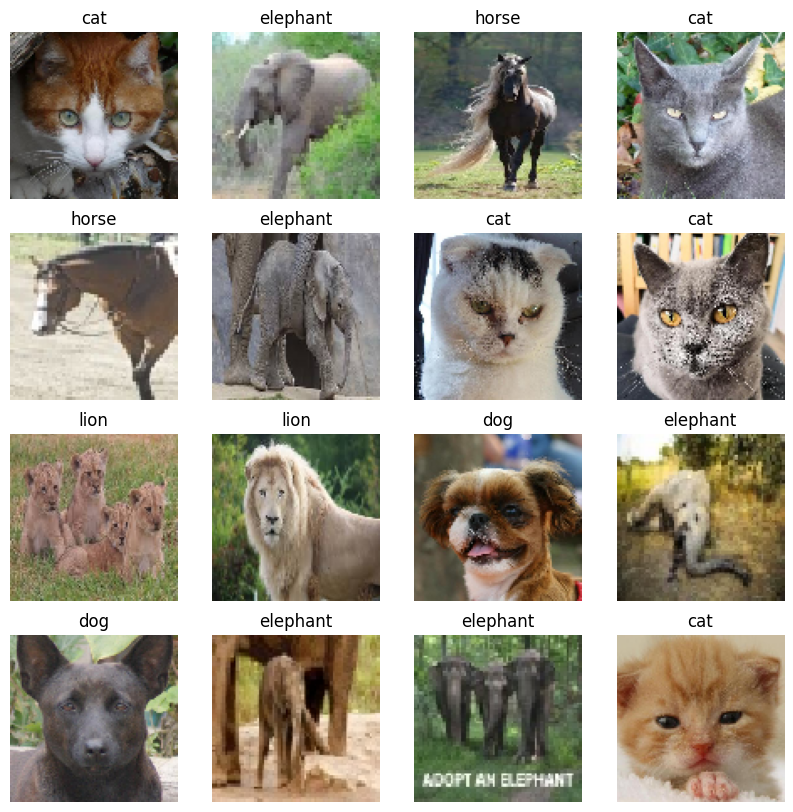

In [8]:
plt.figure(figsize=(10, 10))

images, labels = train_before.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_before[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

# Preprocessing Augmentasi Gambar

In [9]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.15,
)

In [10]:
train_dataset = datagen.flow_from_directory(
    'D:/UNMUL/vscode/PAKBBB/train',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

validation_dataset = datagen.flow_from_directory(
    'D:/UNMUL/vscode/PAKBBB/val',
    class_mode='categorical',
    target_size = (w, h),
    batch_size = 256
)

Found 11995 images belonging to 5 classes.
Found 3000 images belonging to 5 classes.


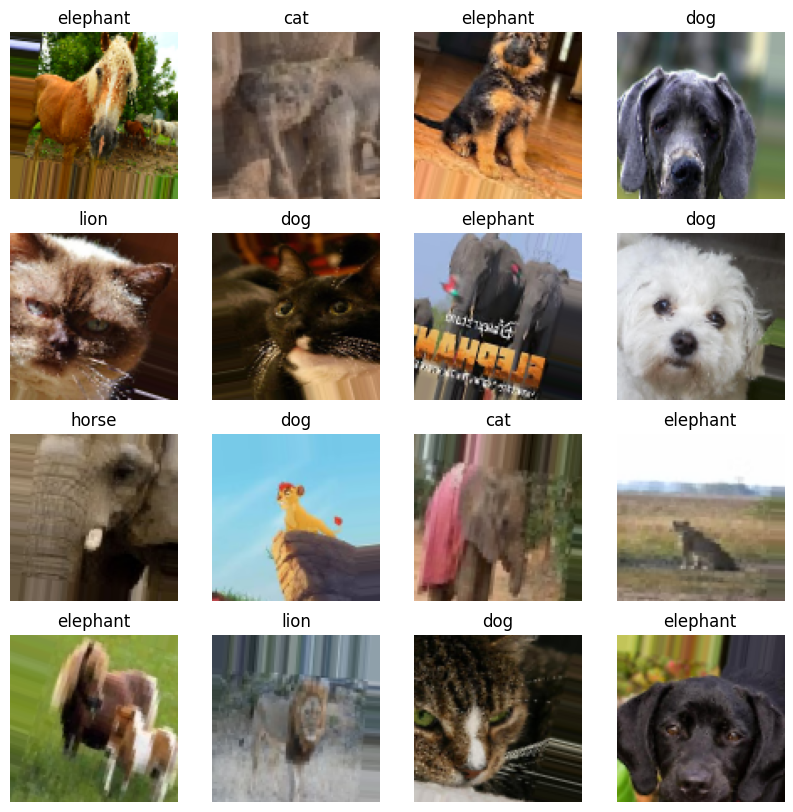

In [13]:
plt.figure(figsize=(10, 10))

images, labels = train_dataset.next()

for i in range (16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_dataset[0][0][i])
  plt.title(class_names[tf.argmax(labels[i])])
  plt.axis('off')

# Membuat Model & Kompilasi

In [14]:
def create_model():

    model = tf.keras.models.Sequential(
        [
        layers.Conv2D(64, (3,3), activation='relu', input_shape=(w, h, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.5),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(256, activation = 'relu'),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5, activation = 'softmax')
        ])
    
    model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       7

In [68]:
# model.compile(
#     optimizer = 'adam',
#     loss = 'categorical_crossentropy',
#     metrics = ['accuracy']
# )
# model.summary()

# Callback & Save Model 


In [15]:
cp_path = "D:/UNMUL/vscode/PAKBBB"
cp_dir = os.path.dirname(cp_path)


cp_callback = tf.keras.callbacks.ModelCheckpoint(cp_path,
                                                save_weights_only=True)

model = create_model()

In [70]:
# class callback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epocj, logs = None):
#         if (logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
#             print('Akurasi telah mencapai 98%!')
#             self.model.stop_training = True

# Melatih Model

In [72]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    validation_steps = 5,
    epochs = 30,
    verbose = 1,
    callbacks = [cp_callback]    
)

Epoch 1/30
47/47 [==============================] - 137s 3s/step - loss: 1.4977 - accuracy: 0.3498 - val_loss: 1.4350 - val_accuracy: 0.3875
Epoch 2/30
47/47 [==============================] - 137s 3s/step - loss: 1.3190 - accuracy: 0.4468 - val_loss: 1.2520 - val_accuracy: 0.4906
Epoch 3/30
47/47 [==============================] - 134s 3s/step - loss: 1.1667 - accuracy: 0.5297 - val_loss: 1.1191 - val_accuracy: 0.5695
Epoch 4/30
47/47 [==============================] - 144s 3s/step - loss: 1.0222 - accuracy: 0.5925 - val_loss: 0.9038 - val_accuracy: 0.6523
Epoch 5/30
47/47 [==============================] - 147s 3s/step - loss: 0.8887 - accuracy: 0.6515 - val_loss: 0.8702 - val_accuracy: 0.6578
Epoch 6/30
47/47 [==============================] - 146s 3s/step - loss: 0.8163 - accuracy: 0.6787 - val_loss: 0.7511 - val_accuracy: 0.7102
Epoch 7/30
47/47 [==============================] - 144s 3s/step - loss: 0.7485 - accuracy: 0.7115 - val_loss: 0.7554 - val_accuracy: 0.7047
Epoch 8/30
47

# Visualisasi Evaluasi

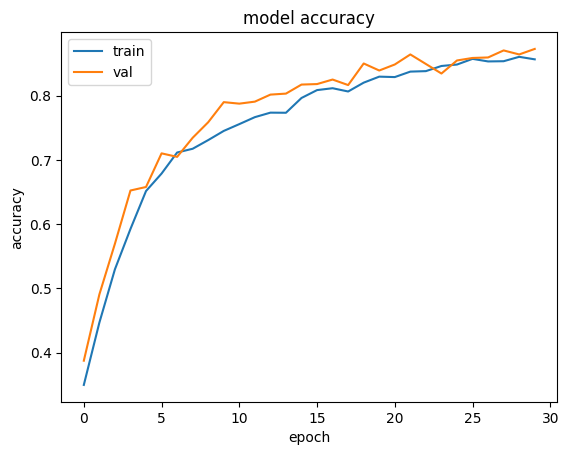

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

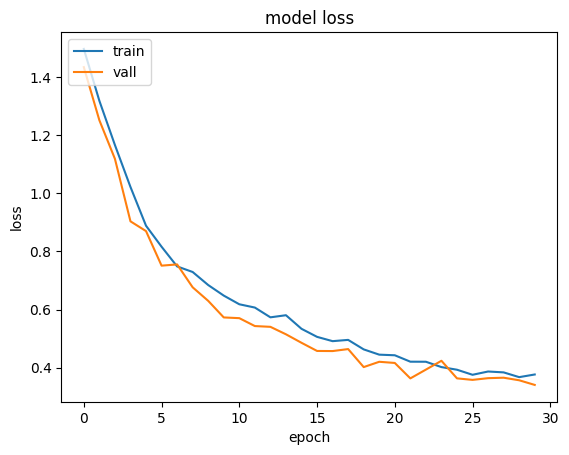

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vall'], loc='upper left')
plt.show()

# Save Model

In [75]:
models = model
model.save('D:/UNMUL/vscode/PAKBBB/variables')

INFO:tensorflow:Assets written to: D:/UNMUL/vscode/PAKBBB/variables\assets


INFO:tensorflow:Assets written to: D:/UNMUL/vscode/PAKBBB/variables\assets


# Load Model 

In [16]:
model.load_weights(cp_path)
loss, acc = model.evaluate(validation_dataset)

12/12 [==============================] - 17s 1s/step - loss: 0.3472 - accuracy: 0.8670


# Evaluasi Models

In [77]:
model.evaluate(validation_dataset)

12/12 [==============================] - 18s 1s/step - loss: 0.3458 - accuracy: 0.8670


[0.34575149416923523, 0.8669999837875366]

# Prediksi



8/8 [==============================] - 1s 75ms/step
horse


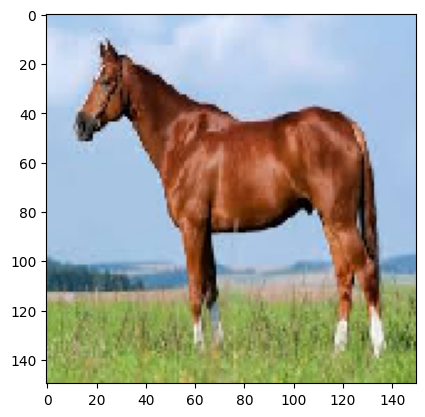

In [20]:
dir = 'D:/UNMUL/vscode/PAKBBB/data prediksi/kuda.jpg'
img = image.load_img(dir, target_size = (150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = py.expand_dims(x, axis = 0)

img = utils.load_img(
    dir, target_size = (w, h)
)

img_array = utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(train_dataset[0][0])
score = tf.nn.softmax(predictions[0])
print("{}" .format(class_names[py.argmax(score)]))

# predictions = model.predict(train_dataset)
# score = tf.nn.softmax(predictions[1])
# print("{}" .format(class_names[py.argmax(score)]))
